In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline

In [59]:
df= pd.read_csv('dataset_limpio.csv')

In [60]:
df

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
0,PH,-34.661824,-58.508839,62000.000000,40.0,Mataderos,Mataderos,14555.078219,1127.272727,bajo
1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo
2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio
3,PH,-34.532957,-58.521782,130000.000000,78.0,Vicente López,Munro,16182.270448,1226.415094,bajo
4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto
...,...,...,...,...,...,...,...,...,...,...
95801,store,-34.490090,-58.530280,281142.857143,123.0,San Isidro,San Isidro,17881.899471,2285.714286,alto
95802,apartment,-34.562700,-58.458290,870000.000000,93.0,Belgrano,Belgrano,8904.350856,7699.115044,alto
95803,house,-34.463120,-58.534810,498000.000000,360.0,San Isidro,Beccar,18984.396239,1383.333333,medio
95804,apartment,-34.570639,-58.475596,131500.000000,39.0,Villa Urquiza,Villa Urquiza,10670.153356,2858.695652,alto


In [61]:
df['segmento_precio_m2_ordinal'] = pd.qcut(df.precio_m2, 10, labels=  [1,2,3,4,5,6,7,8,9,10])

# Baseline

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [63]:
X = df[['surface_covered_in_m2']]
y = df.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [64]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [65]:
predictions = lm.predict(X_test)

In [66]:
y_train

87985    1.195489e+05
25385    1.800000e+05
8598     1.120000e+05
74070    1.100000e+05
56571    1.100000e+05
             ...     
19127    1.300000e+06
89987    1.283069e+05
25926    8.076049e+04
23801    6.721654e+04
44297    6.200000e+04
Name: price_aprox_usd, Length: 71854, dtype: float64

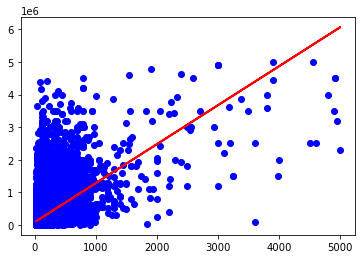

In [67]:
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)
# plt.xscale('log')
# plt.yscale('log')

In [68]:
RMSE = mean_squared_error(y_test, predictions, squared= False)
RMSE

222461.49617835652

In [69]:
df_depto = df[df.property_type == 'apartment']
df_depto

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo,3
2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio,6
4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto,10
5,apartment,-34.559873,-58.443362,195000.000000,60.0,Belgrano,Belgrano,7381.316759,3000.000000,alto,10
6,apartment,-34.486019,-58.503814,115000.000000,36.0,San Isidro,Martínez,15299.501265,2948.717949,alto,9
...,...,...,...,...,...,...,...,...,...,...,...
95795,apartment,-32.000000,-64.000000,84518.100000,52.0,NaN,Córdoba,641427.112303,1625.348077,medio,5
95798,apartment,-34.477060,-58.501770,399115.044248,205.0,San Isidro,Acassuso,15346.031516,1946.902655,alto,7
95802,apartment,-34.562700,-58.458290,870000.000000,93.0,Belgrano,Belgrano,8904.350856,7699.115044,alto,10
95804,apartment,-34.570639,-58.475596,131500.000000,39.0,Villa Urquiza,Villa Urquiza,10670.153356,2858.695652,alto,9


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

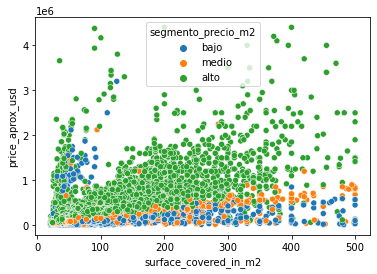

In [70]:
sns.scatterplot(data=df_depto, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

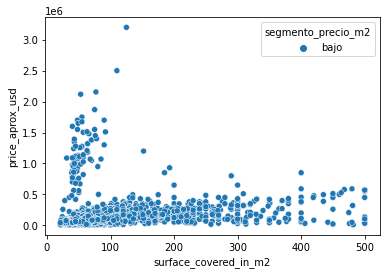

In [71]:
sns.scatterplot(data=df_depto[df_depto.segmento_precio_m2 == 'bajo'], x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')

In [72]:
df_depto.drop(df_depto[(df_depto.surface_covered_in_m2 < 200) & (df_depto.price_aprox_usd > 500000) & (df_depto.segmento_precio_m2 == 'bajo')].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

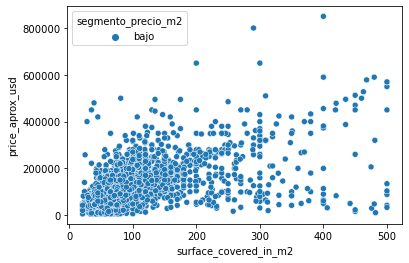

In [73]:
sns.scatterplot(data=df_depto[df_depto.segmento_precio_m2 == 'bajo'], x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

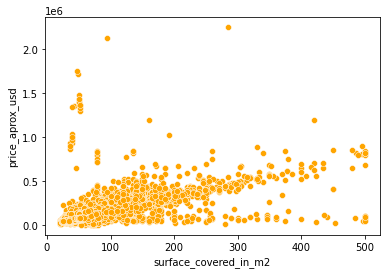

In [74]:
sns.scatterplot(data=df_depto[df_depto.segmento_precio_m2 == 'medio'], x="surface_covered_in_m2", y="price_aprox_usd", color ='orange')

In [75]:
df_depto.drop(df_depto[(df_depto.surface_covered_in_m2 < 100) & (df_depto.price_aprox_usd > 500000) & (df_depto.segmento_precio_m2 == 'medio')].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

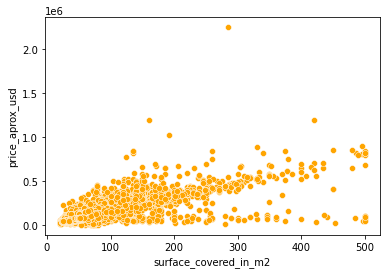

In [76]:
sns.scatterplot(data=df_depto[df_depto.segmento_precio_m2 == 'medio'], x="surface_covered_in_m2", y="price_aprox_usd", color ='orange')

In [77]:
df_depto.drop(df_depto[(df_depto.surface_covered_in_m2 < 300) & (df_depto.price_aprox_usd > 1000000) & (df_depto.segmento_precio_m2 == 'medio')].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

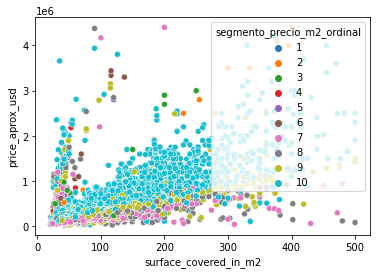

In [78]:
sns.scatterplot(data=df_depto[df_depto.segmento_precio_m2 == 'alto'], x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2_ordinal')

<AxesSubplot:xlabel='precio_m2', ylabel='Count'>

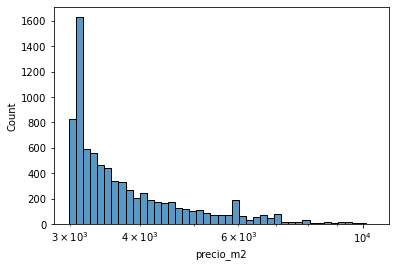

In [79]:
sns.histplot(data=df_depto[df_depto.segmento_precio_m2_ordinal == 10], x="precio_m2", log_scale=True)

In [80]:
print(len(df_depto[df_depto.segmento_precio_m2 == 'alto']))
print(len(df_depto[df_depto.segmento_precio_m2 == 'medio']))
print(len(df_depto[df_depto.segmento_precio_m2 == 'bajo']))

30358
19075
7274


In [81]:
X = df_depto[['surface_covered_in_m2']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_depto = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_depto


0.3578328180708412


167530.09735614262

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
df_db = df_depto[['price_aprox_usd','surface_covered_in_m2']]
df_db = (df_db - df_db.mean()) / df_db.std()

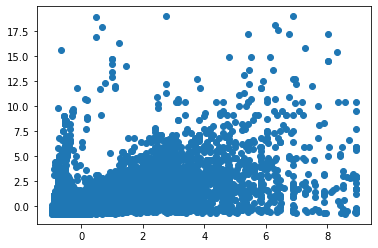

In [84]:
plt.scatter(df_db['surface_covered_in_m2'],df_db['price_aprox_usd'])

In [44]:
dbscan = DBSCAN(eps  = 0.5)
dbscan.fit(df_db)
labels = dbscan.labels_

In [91]:
labels = dbscan.labels_

In [92]:
np.unique(labels, return_counts =True)

(array([0, 1], dtype=int64), array([56545,   162], dtype=int64))

In [93]:
labels[labels != 0] = 1

In [94]:
df_db['labels'] = labels

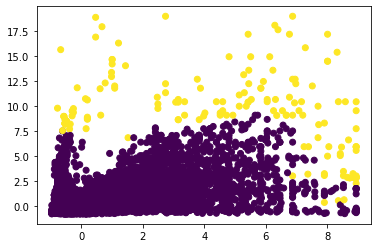

In [95]:
plt.scatter(df_db['surface_covered_in_m2'],df_db['price_aprox_usd'], c = labels)

In [96]:
(df_db['labels'] == 1 ).sum()

162

In [98]:
df_db[df_db['labels'] == 1].index


Int64Index([  443,   710,   985,  3893,  4040,  4212,  4960,  5456,  5785,
             6221,
            ...
            81346, 83822, 85155, 87147, 87899, 88312, 89544, 89950, 89952,
            89953],
           dtype='int64', length=162)

In [99]:
df_depto.drop(df_db[df_db['labels'] == 1].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [100]:
df_depto

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo,3
2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio,6
4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto,10
5,apartment,-34.559873,-58.443362,195000.000000,60.0,Belgrano,Belgrano,7381.316759,3000.000000,alto,10
6,apartment,-34.486019,-58.503814,115000.000000,36.0,San Isidro,Martínez,15299.501265,2948.717949,alto,9
...,...,...,...,...,...,...,...,...,...,...,...
95795,apartment,-32.000000,-64.000000,84518.100000,52.0,NaN,Córdoba,641427.112303,1625.348077,medio,5
95798,apartment,-34.477060,-58.501770,399115.044248,205.0,San Isidro,Acassuso,15346.031516,1946.902655,alto,7
95802,apartment,-34.562700,-58.458290,870000.000000,93.0,Belgrano,Belgrano,8904.350856,7699.115044,alto,10
95804,apartment,-34.570639,-58.475596,131500.000000,39.0,Villa Urquiza,Villa Urquiza,10670.153356,2858.695652,alto,9


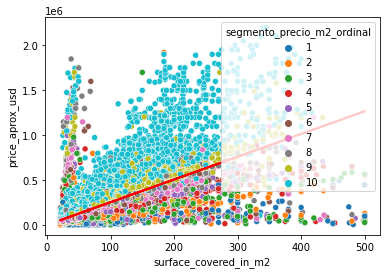

In [104]:
sns.scatterplot(data=df_depto, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2_ordinal')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [103]:
X = df_depto[['surface_covered_in_m2']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_depto = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_depto

0.40882571641824605


143010.67744201142

In [105]:
df_casa = df[df.property_type == 'house']
df_casa

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
9,house,-34.587911,-58.698783,2.500000e+05,164.0,San Miguel,Bella Vista,35349.816514,1524.390244,medio,5
12,house,-34.425087,-58.579658,5.700000e+05,270.0,Tigre,Tigre,24445.655404,2111.111111,alto,7
14,house,-31.052985,-64.499128,3.964399e+04,148.0,Villa Giardino,Villa Giardino,707302.282443,267.864769,bajo,1
16,house,-34.650116,-58.966034,2.900000e+05,200.0,General Rodríguez,General Rodríguez,65156.401814,1450.000000,medio,4
20,house,-34.364092,-58.689735,2.650000e+05,190.0,Tigre,Barrio San Gabriel,37093.806594,1152.173913,bajo,3
...,...,...,...,...,...,...,...,...,...,...,...
95796,house,-34.333330,-58.750000,2.175108e+05,178.0,Escobar,Escobar,43989.117122,1221.970840,bajo,3
95797,house,-34.493970,-58.516790,2.414458e+05,120.0,San Isidro,Martínez,16408.946342,2012.048193,alto,7
95799,house,-34.477060,-58.501770,8.176991e+05,420.0,San Isidro,Acassuso,15346.031516,1946.902655,alto,7
95800,house,-34.493970,-58.516790,1.207229e+06,600.0,San Isidro,Martínez,16408.946342,2012.048193,alto,7


In [106]:
X = df_casa[['surface_covered_in_m2']]
y = df_casa.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_casa = mean_squared_error(y_test, predictions, squared= False)
RMSE_casa


242527.5132523138

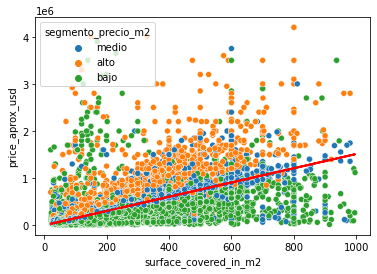

In [107]:
sns.scatterplot(data=df_casa, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [109]:
df_db = df_casa[['price_aprox_usd','surface_covered_in_m2']]
df_db = (df_db - df_db.mean()) / df_db.std()

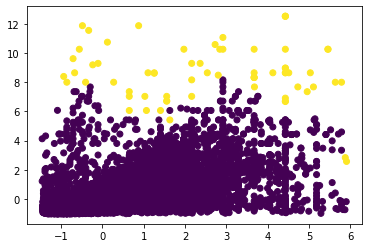

In [110]:
dbscan = DBSCAN(eps  = 0.5)
dbscan.fit(df_db)
labels = dbscan.labels_
labels = dbscan.labels_
np.unique(labels, return_counts =True)
labels[labels != 0] = 1
df_db['labels'] = labels
plt.scatter(df_db['surface_covered_in_m2'],df_db['price_aprox_usd'], c = labels)

In [111]:
(df_db['labels'] == 1 ).sum()
df_db[df_db['labels'] == 1].index

df_casa.drop(df_db[df_db['labels'] == 1].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


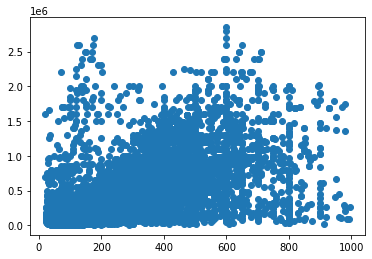

In [113]:
plt.scatter(df_casa['surface_covered_in_m2'],df_casa['price_aprox_usd'])

In [117]:
X = df_casa[['surface_covered_in_m2']]
y = df_casa.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_casa = mean_squared_error(y_test, predictions, squared= False)
RMSE_casa

207789.8164531222

In [118]:
df_store = df[df.property_type == 'store']
df_store

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
51,store,-34.563972,-58.456535,250000.000000,30.0,Belgrano,Belgrano,8695.892070,8333.333333,alto,10
81,store,-31.376408,-64.212330,75000.000000,180.0,Córdoba,Córdoba,672184.986938,1139.263323,bajo,3
167,store,-34.606297,-58.392189,295000.000000,103.0,Congreso,Congreso,1185.555570,2864.077670,alto,9
176,store,-34.590181,-58.449152,175000.000000,80.0,Chacarita,Chacarita,7581.832011,2187.500000,alto,8
306,store,-34.595967,-58.409774,139000.000000,33.0,Recoleta,Recoleta,3191.406723,4212.121212,alto,10
...,...,...,...,...,...,...,...,...,...,...,...
95625,store,-34.595772,-58.385802,381250.000000,122.0,Recoleta,Recoleta,736.643346,3125.000000,alto,10
95657,store,-34.606977,-58.376367,426084.744167,287.0,NaN,Capital Federal,584.936148,1484.615833,medio,4
95700,store,-34.649660,-58.383410,355000.000000,169.0,Barracas,Barracas,2596.027124,2100.591716,alto,7
95741,store,-34.637014,-58.433177,210000.000000,403.0,NaN,Capital Federal,6039.195608,521.091811,bajo,1


In [119]:
X = df_store[['surface_covered_in_m2']]
y = df_store.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_store = mean_squared_error(y_test, predictions, squared= False)
RMSE_store


419175.9587737394

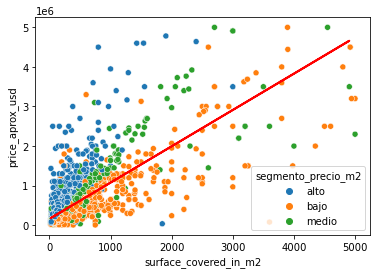

In [120]:
sns.scatterplot(data=df_store, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [122]:
df_db = df_store[['price_aprox_usd','surface_covered_in_m2']]
df_db = (df_db - df_db.mean()) / df_db.std()

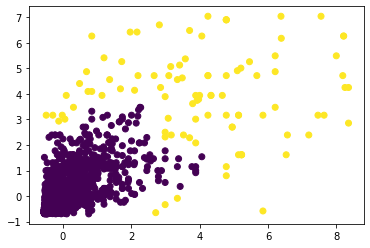

In [123]:
dbscan = DBSCAN(eps  = 0.5)
dbscan.fit(df_db)
labels = dbscan.labels_
labels = dbscan.labels_
np.unique(labels, return_counts =True)
labels[labels != 0] = 1
df_db['labels'] = labels
plt.scatter(df_db['surface_covered_in_m2'],df_db['price_aprox_usd'], c = labels)

In [124]:
(df_db['labels'] == 1 ).sum()
df_db[df_db['labels'] == 1].index

df_store.drop(df_db[df_db['labels'] == 1].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


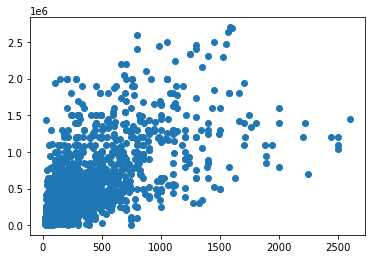

In [125]:
plt.scatter(df_store['surface_covered_in_m2'],df_store['price_aprox_usd'])

In [126]:
X = df_store[['surface_covered_in_m2']]
y = df_store.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_store = mean_squared_error(y_test, predictions, squared= False)
RMSE_store


325224.0913412817

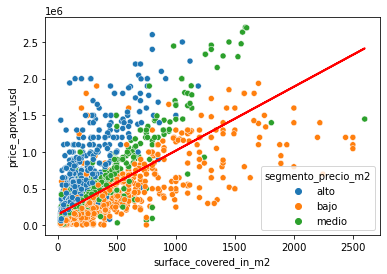

In [127]:
sns.scatterplot(data=df_store, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [128]:
from sklearn.linear_model import HuberRegressor
hreg =HuberRegressor()
model_h = hreg.fit(X_train, y_train)

predictions_h = model_h.predict(X_test)

RMSE_ph_r = mean_squared_error(y_test, predictions_h, squared= False)
RMSE_ph_r

329818.95477249956

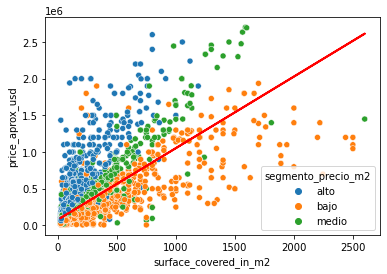

In [129]:
sns.scatterplot(data=df_store, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model_h.predict(X_train), color='red', linewidth=2)

In [130]:
df_ph = df[df.property_type == 'PH']
df_ph

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
0,PH,-34.661824,-58.508839,62000.000,40.0,Mataderos,Mataderos,14555.078219,1127.272727,bajo,3
3,PH,-34.532957,-58.521782,130000.000,78.0,Vicente López,Munro,16182.270448,1226.415094,bajo,3
10,PH,-34.652356,-58.501624,239000.000,98.0,Mataderos,Mataderos,13651.907067,1707.142857,medio,6
28,PH,-34.527253,-58.512877,169000.000,160.0,Vicente López,Munro,15323.042057,982.558140,bajo,2
40,PH,-34.451854,-58.903567,165000.000,140.0,Pilar,Pilar,58826.175270,1178.571429,bajo,3
...,...,...,...,...,...,...,...,...,...,...,...
95658,PH,-34.640447,-58.419682,492240.000,70.0,Boedo,Boedo,4714.731123,7032.000000,alto,10
95662,PH,-32.000000,-64.000000,211355.053,140.0,NaN,Córdoba,641427.112303,1509.678950,medio,4
95676,PH,-34.623575,-58.466642,220000.000,206.0,Flores,Flores,9536.565562,2076.923077,alto,7
95723,PH,-34.420580,-58.582790,155000.000,100.0,Tigre,Tigre,24873.611776,1650.000000,medio,5


In [131]:
X = df_ph[['surface_covered_in_m2']]
y = df_ph.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_ph = mean_squared_error(y_test, predictions, squared= False)
RMSE_ph

135718.98881885846

In [132]:
df_db = df_ph[['price_aprox_usd','surface_covered_in_m2']]
df_db = (df_db - df_db.mean()) / df_db.std()

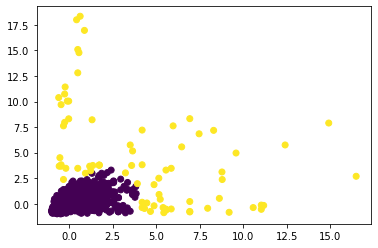

In [133]:
dbscan = DBSCAN(eps  = 0.5)
dbscan.fit(df_db)
labels = dbscan.labels_
labels = dbscan.labels_
np.unique(labels, return_counts =True)
labels[labels != 0] = 1
df_db['labels'] = labels
plt.scatter(df_db['surface_covered_in_m2'],df_db['price_aprox_usd'], c = labels)

In [134]:
(df_db['labels'] == 1 ).sum()
df_db[df_db['labels'] == 1].index

df_ph.drop(df_db[df_db['labels'] == 1].index, inplace=True)

C:\Users\Soledad\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [135]:
X = df_ph[['surface_covered_in_m2']]
y = df_ph.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_ph = mean_squared_error(y_test, predictions, squared= False)
RMSE_ph

59469.83859982286

In [136]:
hreg =HuberRegressor()
model_h = hreg.fit(X_train, y_train)

predictions_h = model_h.predict(X_test)

RMSE_ph_r = mean_squared_error(y_test, predictions_h, squared= False)
RMSE_ph_r

59907.227326116146

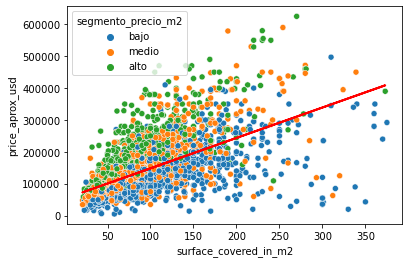

In [137]:
sns.scatterplot(data=df_ph, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

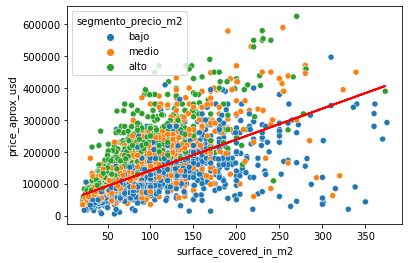

In [138]:
sns.scatterplot(data=df_ph, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model_h.predict(X_train), color='red', linewidth=2)

In [139]:
rmse_dict = {'RMSE_ph' :RMSE_ph  , 'RMSE_casa':RMSE_casa, 'RMSE_depto':RMSE_depto, 'RMSE_store':RMSE_store, 'RMSE':RMSE}
rmse_dict

{'RMSE_ph': 59469.83859982286,
 'RMSE_casa': 207789.8164531222,
 'RMSE_depto': 143010.67744201142,
 'RMSE_store': 325224.0913412817,
 'RMSE': 222461.49617835652}

<BarContainer object of 5 artists>

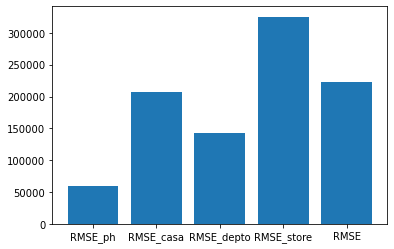

In [140]:
plt.bar(list(rmse_dict.keys()), list(rmse_dict.values()), align='center')

In [141]:
df_ph.to_csv('df_ph.csv')
df_casa.to_csv('df_casa.csv')
df_store.to_csv('df_store.csv')
df_depto.to_csv('df_depto.csv')